# Adaption of OLA 6 for project

Aric Moilanen 

## Problem 1

In [198]:
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from IPython.display import display

In [199]:
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

In [220]:
def grab_image(img_path_base, index, numImages):
    #Desired image dimension (image will be square ie # by # pixels)
    imageDim = 250
    
    if (index<10):
        img_path = img_path_base+"000"+str(index)+"_model.png"
    elif (index<100 and index >=10):
        img_path = img_path_base+"00"+str(index)+"_model.png"
    elif (index<1000 and index>=100):
        img_path = img_path_base+"0"+str(index)+"_model.png"
    elif (index<10000 and index>=1000):
        img_path = img_path_base+str(index)+"_model.png"
        
    img = image.load_img(img_path, target_size=(imageDim, imageDim), color_mode = "grayscale")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

#Num of images to read in
numImages = 600
X = np.concatenate([grab_image('/home/atm4w/Project/Data/miscImgs/',i, numImages) for i in range(numImages)]) 
X /= 255.0

X.shape

(600, 250, 250, 1)

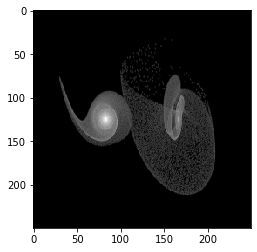

In [221]:
plt.imshow(image.array_to_img(X[45,:,:,:]), cmap='Greys_r')
plt.show()

In [222]:
Y = np.loadtxt('/home/atm4w/Project/Data/miscImgs/scores/humanScores.txt')
display(Y.shape)
display(Y[0:10])

(1294,)

array([0.945946, 0.941176, 0.918919, 0.916667, 0.916667, 0.914286,
       0.914286, 0.911765, 0.891892, 0.885714])

In [223]:
p = np.random.permutation(len(X))
Xshuffled = X[p]
Yshuffled = Y[p]

display(Xshuffled.shape)
display(Yshuffled.shape)

(600, 250, 250, 1)

(600,)

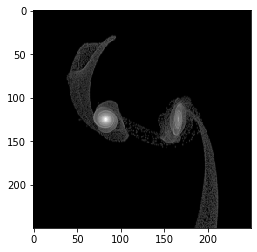

0.714286

In [224]:
plt.imshow(image.array_to_img(Xshuffled[0,:,:,:]), cmap='Greys_r')
plt.show()
display(Yshuffled[0])

In [225]:
x_train = Xshuffled[0:(round(numImages*.85)),:,:]
y_train = Yshuffled[0:(round(numImages*.85))]
x_test = Xshuffled[(round(numImages*.85)): , : , :]
y_test = Yshuffled[(round(numImages*.85)):]

display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(510, 250, 250, 1)

(510,)

(90, 250, 250, 1)

(90,)

In [230]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(8, 8),
                activation='relu',
                input_shape=[x_test.shape[1],
                x_test.shape[2],
                x_test.shape[3]]))
model.add(keras.layers.Conv2D(16, kernel_size=(50, 50), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(128, activation='relu'))
#model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))


model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['mse'])
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 243, 243, 16)      1040      
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 194, 194, 16)      640016    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 97, 97, 16)        0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 150544)            0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 150545    
Total params: 791,601
Trainable params: 791,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 6
epochs = 15
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_split = 0.2)

Train on 408 samples, validate on 102 samples
Epoch 1/15
156/408 [==========>...................] - ETA: 18:54 - loss: 0.0636 - mse: 0.0636

In [ ]:
plt.figure()
# summarize history for accuracy
#plt.subplot(211)
#plt.plot(history.history['mean_squared_error'])
#plt.plot(history.history['val_mean_squared_error'])
#plt.title('model mean_squared_error')
#plt.ylabel('mean_squared_error')
#plt.xlabel('epoch')
#plt.legend(['training', 'validation'], loc='upper left')
#* summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [216]:
preds = model.predict(x_test)

diff = preds.flatten() - (y_test)

display(preds)
display(y_test)
display(diff)

array([[0.27530932],
       [0.27289784],
       [0.2748932 ],
       [0.31090805],
       [0.26619807],
       [0.28803253],
       [0.25901112],
       [0.2938296 ],
       [0.3010045 ],
       [0.27409512],
       [0.30381343],
       [0.32748395],
       [0.2644739 ],
       [0.27119318],
       [0.30310374],
       [0.33978897],
       [0.30732697],
       [0.2732267 ],
       [0.25448236],
       [0.27235582],
       [0.27253374],
       [0.2811449 ],
       [0.26221493],
       [0.31695914],
       [0.26984122],
       [0.31895602],
       [0.25800872],
       [0.31314808],
       [0.36478338],
       [0.2841618 ],
       [0.26845193],
       [0.27395973],
       [0.29432905],
       [0.30507565],
       [0.2964444 ],
       [0.34335572],
       [0.2616505 ],
       [0.27811038],
       [0.25732732],
       [0.2757501 ],
       [0.28693944],
       [0.30094707],
       [0.26338202],
       [0.2846041 ],
       [0.25150484],
       [0.26609138],
       [0.30527273],
       [0.282

array([0.333333, 0.117647, 0.117647, 0.885714, 0.147059, 0.75    ,
       0.117647, 0.235294, 0.885714, 0.114286, 0.777778, 0.685714,
       0.166667, 0.111111, 0.285714, 0.371429, 0.088235, 0.514286,
       0.171429, 0.147059, 0.114286, 0.371429, 0.088235, 0.6     ,
       0.111111, 0.861111, 0.166667, 0.088235, 0.342857, 0.428571,
       0.166667, 0.25    , 0.352941, 0.205882, 0.444444, 0.205882,
       0.257143, 0.297297, 0.352941, 0.111111, 0.176471, 0.676471,
       0.294118, 0.228571, 0.088235, 0.138889, 0.135135, 0.147059,
       0.088235, 0.542857, 0.2     , 0.305556, 0.142857, 0.5     ,
       0.324324, 0.147059, 0.166667, 0.147059, 0.857143, 0.111111,
       0.264706, 0.138889, 0.264706, 0.147059, 0.114286, 0.142857,
       0.114286, 0.142857, 0.147059, 0.111111, 0.162162, 0.138889,
       0.147059, 0.176471, 0.114286, 0.114286, 0.235294, 0.342857,
       0.2     , 0.428571, 0.694444, 0.111111, 0.648649, 0.114286,
       0.685714, 0.111111, 0.428571, 0.117647, 0.333333, 0.142

array([-5.80236757e-02,  1.55250840e-01,  1.57246194e-01, -5.74805951e-01,
        1.19139069e-01, -4.61967468e-01,  1.41364120e-01,  5.85355901e-02,
       -5.84709501e-01,  1.59809118e-01, -4.73964572e-01, -3.58230048e-01,
        9.78068853e-02,  1.60082177e-01,  1.73897450e-02, -3.16400267e-02,
        2.19091972e-01, -2.41059292e-01,  8.30533587e-02,  1.25296825e-01,
        1.58247745e-01, -9.02841128e-02,  1.73979929e-01, -2.83040857e-01,
        1.58730224e-01, -5.42154983e-01,  9.13417185e-02,  2.24913081e-01,
        2.19263765e-02, -1.44409194e-01,  1.01784929e-01,  2.39597261e-02,
       -5.86119528e-02,  9.91936454e-02, -1.47999614e-01,  1.37473715e-01,
        4.50750268e-03, -1.91866151e-02, -9.56136818e-02,  1.64639101e-01,
        1.10468442e-01, -3.75523930e-01, -3.07359824e-02,  5.60331024e-02,
        1.63269838e-01,  1.27202377e-01,  1.70137728e-01,  1.35750168e-01,
        2.33111641e-01, -2.73604789e-01,  6.82811618e-02, -2.30824359e-02,
        1.20250002e-01, -

In [217]:
model.evaluate(x_test, y_test)

90/90 [==============================] - 0s 216us/step


[0.042476099936498535, 0.042476098984479904]